# 인공신경망

<input -> hidden layer -> output>

input : 벡터의 형태로 입력데이터 받는다.

hidden layer: input으로 받은 데이터로 가중치와 활성화 함수를 이용해서 수행된다.

output : 노드의 수는 예측하고자 하는 값의 개수에 따라 다르다.

Loss funtion : 손실함수를 최소화하는 방향으로 가중치 업데이트, 예측값과 실제값 차이 계산
                분류에서는 cross entroy/회귀에서는 MSE

## 인공신경망 가중치를 적용한 시각화 실습

In [1]:
import torch
import matplotlib.pyplot as plt

In [3]:
# 2차원 가중치 행렬 랜덤으로 초기화
w = torch.randn(3,3)
print(w)

# 2차원 가중치 -> 1차원 행렬 :flat
w_flatted = w.flatten()
print(w_flatted)

tensor([[ 1.9409,  1.3037, -0.2452],
        [ 0.7622,  0.4193, -1.2462],
        [ 1.7863,  0.2313, -1.1014]])
tensor([ 1.9409,  1.3037, -0.2452,  0.7622,  0.4193, -1.2462,  1.7863,  0.2313,
        -1.1014])


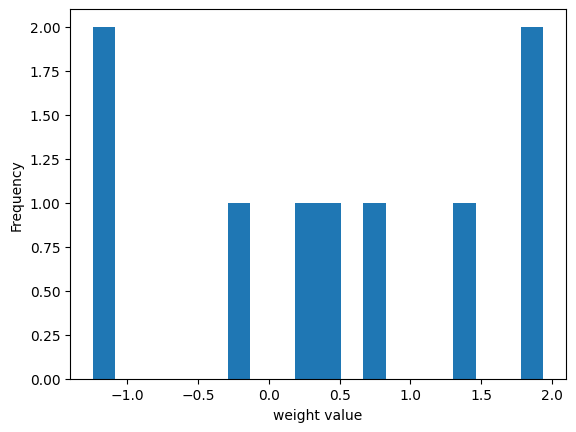

In [7]:
# 시각화
plt.hist(w_flatted, bins=20)
plt.xlabel('weight value')
plt.ylabel('Frequency')
plt.show()

## Bias 크기가 1인 랜덤함 값을 가지는 값

tensor([0.1917])


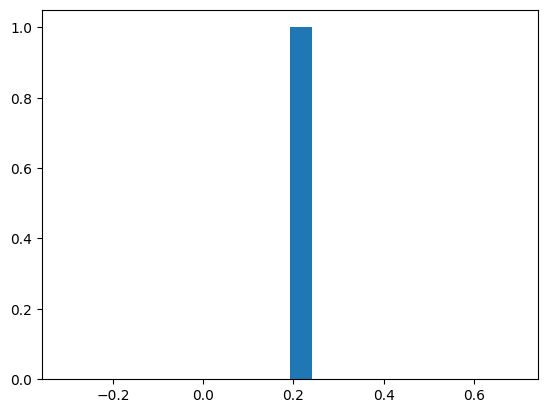

In [11]:
b = torch.rand(1)
print(b)

#tensor -> numpy
plt.hist(b.detach().numpy(), bins=20)
#plt.hist(b, bins=20)
plt.show()

숫자를 키우면 더 자세히 볼 수 있다

## Loss Function

### MSE mean squared error - 회귀

In [13]:
import numpy as np
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

y_true = np.array([1,2,3,4])
y_pred = np.array([3,4,6,7])

mse = mean_squared_error(y_true,y_pred)
print(mse)

6.5


### Cross entropy - 분류

In [16]:
#binary cross entropy

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    n = y_true.shape[0]
    loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1-y_true) * np.log(1-y_pred + epsilon))
    return loss

loss = binary_cross_entropy_loss(y_true, y_pred)
print(loss)

nan


C:\Users\iiile\AppData\Local\Temp\ipykernel_36296\343977442.py:6: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1-y_true) * np.log(1-y_pred + epsilon))


In [ ]:
#

## Acitvate function

### sigmoid
0~1까지의 값 범위

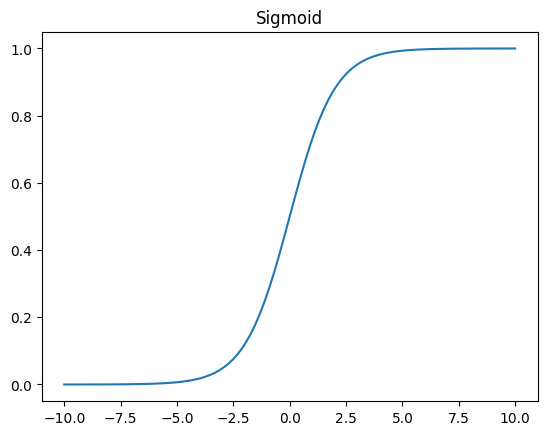

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10,10,100)     #-10~10까지 100개
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid')
plt.show()

### hyperbolic tangent function

시그모이드와 다른점은 값의 범위가 -1~1 사이

-0.9999092042625951
0.9999092042625951


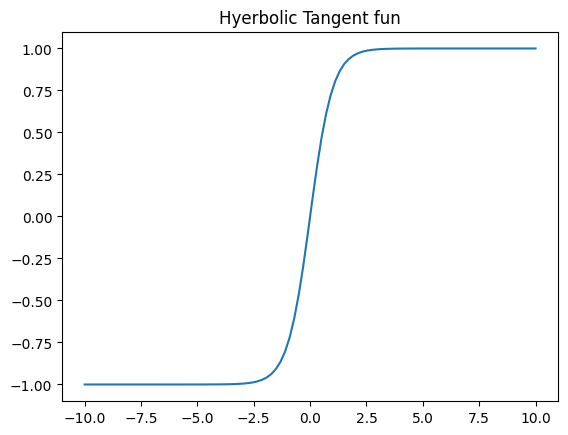

In [20]:
def tanh(x):
    return np.tanh(x)

#x = np.linspace(-10,10,100)     #-10~10까지 100개
y = tanh(x)

print(tanh(-5))
print(tanh(5))

plt.plot(x,y)
plt.title('Hyerbolic Tangent fun')
plt.show()

### ReLU function

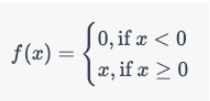 계산 속도가 빠르다

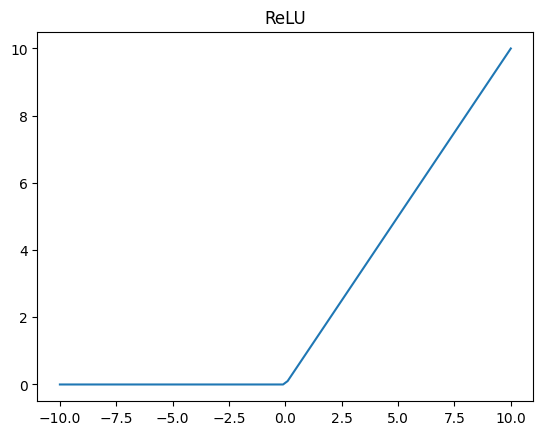

In [28]:
def relu(x):
    return np.maximum(0,x)

y = relu(x)

plt.plot(x,y)
plt.title('ReLU')
plt.show()

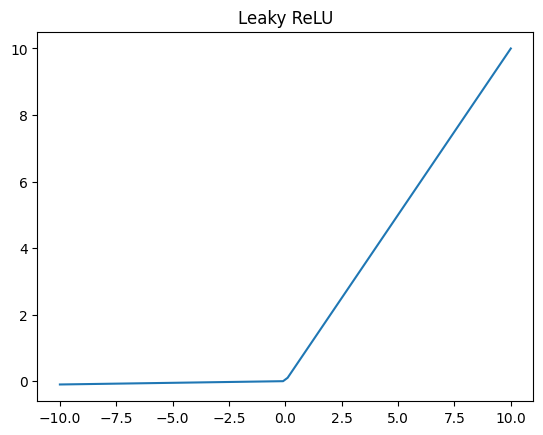

In [30]:
#Leaky ReLU function: 음수포함
def leaky_relu(x, aplpha=0.01):
    return np.where(x>=0, x, x*aplpha)

y = leaky_relu(x)

plt.plot(x,y)
plt.title('Leaky ReLU')
plt.show()

### Softmax function
다중클래스에서 사용, 전부 더하면 1

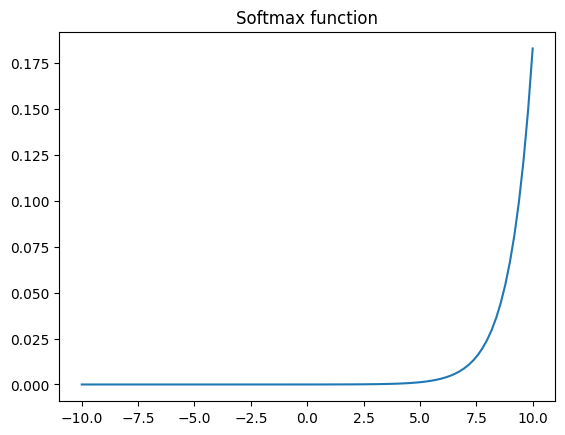

In [31]:
def softmax(z):
    return np.exp(z)/ np.sum(np.exp(z))

y = softmax(x)

plt.plot(x,y)
plt.title('Softmax function')
plt.show()

## Backpropagation
가중치와 bias를 학습시키기 위한 알고리즘 중 하나,

손실함수를 최소화하는 가중치와 편향을 찾아야한다

## Output, Predict

# Test: 100 epoch plot visualize
이진분류 문제

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#인공 신경망 클래스 정의
class SimpleNet(nn.Module):
    #input 2, hidden 1(node 5), output 1(sigmoid)
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2,5)   # intput 2 -> hidden node 5
        self.fc2 = nn.Linear(5,1)   # node 5 -> output 1

    def forward(self,x):
        x= torch.relu(self.fc1(x))      # fc1 -> ReLU ->
        x = torch.sigmoid(self.fc2(x))  # fc2 -> sigmoid
        return x

# create data
x = torch.randn(100,2)
y = ((x[:,0]>0) & (x[:,1]>0)).float()   #label 0/1

# Define model
model = SimpleNet()
print(model)

# Define Loss function, Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


In [37]:
#학습시작
for epoch in range(1000):
    #순전파
    y_pred = model(x)
    
    #손실 계산
    loss = criterion(y_pred.squeeze(), y)

    #역전파
    optimizer.zero_grad()   #옵티마이저 모든 가중치에 대한 변화 0초기화/ 이전 기울기 값 남아있어서
    loss.backward()         #손실함수 역전파 수행
    optimizer.step()        #가중치 업데이트

    #중간결과 시각화
    # if epoch%10 ==0:
    #     plt.clf()
    #     plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
    #     plt.show()

print('complete')

complete


![스크린샷 2023-06-23 152025.png](<attachment:스크린샷 2023-06-23 152025.png>)

![스크린샷 2023-06-23 152041.png](<attachment:스크린샷 2023-06-23 152041.png>)

![스크린샷 2023-06-23 152114.png](<attachment:스크린샷 2023-06-23 152114.png>)
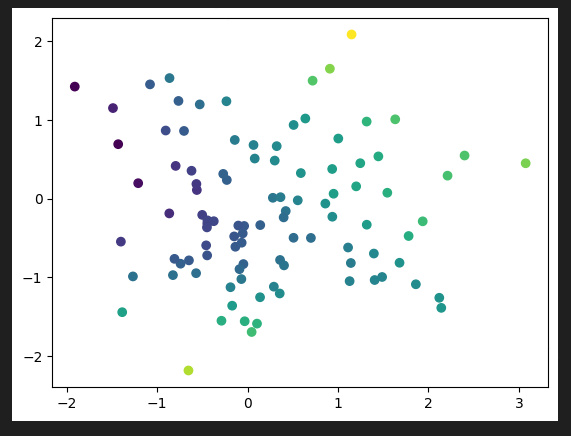
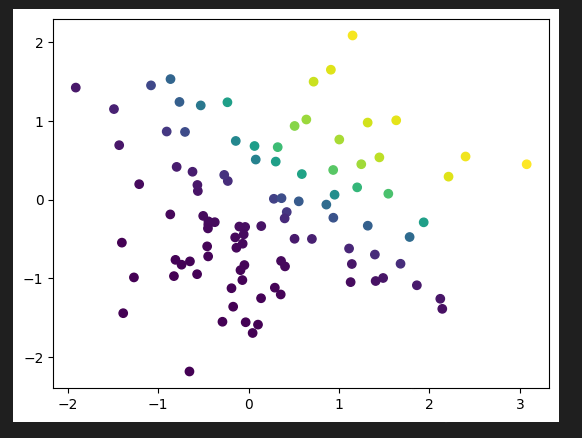
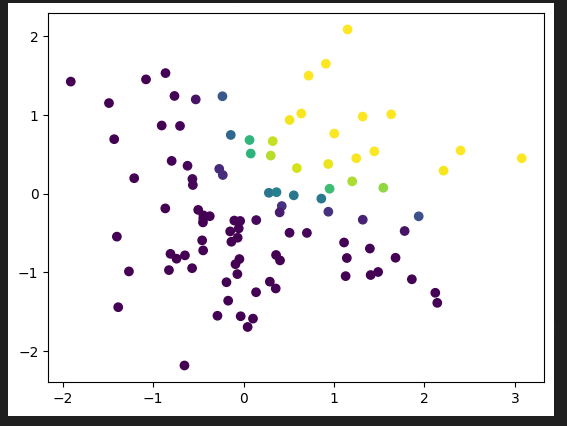